## Analise exploratoria dos dados
### Contexto
Este estudo reúne informações socioeconômicas, territoriais e ambientais dos bairros de Belém com o intuito de compreender como características populacionais, indicadores de desenvolvimento humano e registros de descartes irregulares de resíduos se relacionam. A análise busca identificar padrões que possam explicar a ocorrência de Depósitos Irregulares de Entulho (DIEs) e como esses eventos se distribuem espacialmente em função das condições sociais e estruturais de cada bairro.

### Descrição das variaveis
- `Bairro:` Nome do bairro de Belém.
- `area_km2` Aréa do bairro  
- `Hab:` Número total de habitações no bairro.  
- `Mor:` Número total de moradores no bairro.  
- `Mor/Hab:` Média de moradores por habitação (`Moradores ÷ Habitações`).  
- `N_ren:` Número de moradores com renda registrada.  
- `ren_avg:`Renda média dos moradores do bairro.  
- `ren_mdn` Mediana da renda dos moradores do bairro
- `T.A.` Taxa de alfabetização
- `IDH-R` Índice de desenvolvimento humano Renda
- `IDH-L` Índice de desenvolvimento humano Longevidade
- `IDH-E` Índice de desenvolvimento humano Educação
- `IDH` Índice de desenvolvimento humano
- `QTI` Quantidade de Depósitos Irregulares
- `CRA` Mediana da renda dos moradores do bairro
- `PPR` Percentual Populacao_rendimento
- `DIEs` Quantidade de Depósitos Irregulares estimado

### Objetivo do estudo

O propósito central é identificar as regiões de Belém mais vulneráveis ao descarte irregular de resíduos, analisando como fatores socioeconômicos, densidade populacional e indicadores de desenvolvimento humano influenciam a ocorrência de depósitos irregulares. Os resultados apoiarão:

- A priorização de áreas críticas para fiscalização e ações educativas;
- A identificação de possíveis falhas na coleta de resíduos;
- O planejamento de políticas públicas mais eficientes para a gestão e prevenção do descarte irregular.


## 1.Biblioteca

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from setup_notebook import setup_path
setup_path()
from src.functions import *

from matplotlib.colors import LinearSegmentedColormap


color = sns.color_palette('RdBu_r',16)
sns.color_palette(color)

[(0.08419838523644754, 0.31280276816609, 0.5534025374855825),
 (0.1529411764705883, 0.4311418685121108, 0.6904267589388697),
 (0.23137254901960788, 0.5349480968858131, 0.7434832756632065),
 (0.3720876585928491, 0.6456747404844292, 0.8020761245674741),
 (0.554325259515571, 0.7610149942329875, 0.8643598615916955),
 (0.7033448673587083, 0.8389850057670127, 0.9079584775086506),
 (0.8371395617070359, 0.9063437139561707, 0.9444059976931949),
 (0.92479815455594, 0.9478662053056517, 0.9605536332179931),
 (0.9755478662053056, 0.9363321799307959, 0.9132641291810842),
 (0.9893886966551326, 0.8717416378316032, 0.8025374855824683),
 (0.9755478662053056, 0.7591695501730104, 0.6530565167243367),
 (0.9499423298731259, 0.6311418685121111, 0.49757785467128046),
 (0.8807381776239908, 0.47197231833910036, 0.3753171856978085),
 (0.8059976931949251, 0.31003460207612454, 0.27058823529411763),
 (0.7229527104959631, 0.1439446366782007, 0.19215686274509805),
 (0.5769319492502883, 0.05536332179930796, 0.14925028835063436)]

## 2. Dataload

In [13]:
# ---------------------------
# 0) carregue os arquivos (ajuste paths)
# ---------------------------
path_proc = "/home/akel/PycharmProjects/Data_ambiental/data/process/"

dfo = pd.read_csv(path_proc + "tabela_total_com_DIEs.csv").rename(columns={'Quantidade de Depósitos Irregulares':'QTI','Depósitos Irregulares est.': 'DIEs',})

features=dfo.drop(['Bairro','DIEs'], axis=1).columns
dfo.head(5)

,Bairro,area_km2,Hab,Mor,Mor/Hab,N_ren,ren_avg,ren_mdn,T.A.,IDH-R,IDH-L,IDH-E,IDH,QTI,CRA,PPR,DIEs
0,Cidade Velha,1.474443,3086,12119,3.93,6976.0,1931.71,1000.0,98.64,0.828,0.891,0.802,0.840,3.0,5148.804637,0.575625,3.0
1,Guamá,4.310685,23402,94432,4.04,44917.0,940.73,510.0,95.91,0.709,0.830,0.699,0.746,4.0,881.657789,0.475654,4.0
2,Jurunas,2.557641,15886,64478,4.06,32828.0,1065.28,510.0,95.99,0.778,0.872,0.762,0.802,9.0,1691.025975,0.509135,9.0
3,Marambaia,5.052314,17563,66697,3.80,35312.0,1357.51,710.0,97.43,0.792,0.805,0.772,0.813,5.0,1021.024833,0.529439,5.0
4,Marco,4.903819,18162,65819,3.62,36975.0,2096.32,1000.0,98.38,0.833,0.888,0.803,0.841,3.0,1547.503739,0.561768,3.0


In [14]:
inital_describe(dfo)

📊 ANÁLISE EXPLORATÓRIA DO DATAFRAME

📈 DIMENSÕES DO DATASET:
   • 71 linhas
   • 17 colunas
   • Total de células: 1207

🔧 TIPOS DE DADOS:
   • float64: 14 colunas
   • int64: 2 colunas
   • object: 1 colunas

📋 DETALHAMENTO DOS TIPOS POR COLUNA:
             Tipo
Bairro     object
area_km2  float64
Hab         int64
Mor         int64
Mor/Hab   float64
N_ren     float64
ren_avg   float64
ren_mdn   float64
T.A.      float64
IDH-R     float64
IDH-L     float64
IDH-E     float64
IDH       float64
QTI       float64
CRA       float64
PPR       float64
DIEs      float64

🔍 VERIFICAÇÃO DE QUALIDADE DOS DADOS

📝 REGISTROS DUPLICADOS:
   • Total: 0
   • Percentual: 0.00%

❌ VALORES NULOS:
   • Total: 50
   • Percentual: 4.14%

📊 COLUNAS COM VALORES NULOS:
   • QTI: 50 nulos (70.42%)

🔎 ANÁLISE DAS COLUNAS CATEGÓRICAS

BAIRRO
Quantidade de valores únicos: 71
Valores: ['Cidade Velha' 'Guamá' 'Jurunas' 'Marambaia' 'Marco' 'Pedreira'
 'Sacramenta' 'São Brás' 'Souza' 'Telégrafo' 'Campina' 'Umarizal'

,count,mean,std,min,25%,50%,75%,max
area_km2,71.0,3.557682,3.945327,0.354317,1.490217,2.412497,4.446335,30.143205
Hab,71.0,5153.943662,5585.210284,42.000000,610.500000,3109.000000,7649.500000,23402.000000
Mor,71.0,19442.380282,21492.126610,132.000000,2425.500000,12124.000000,29702.000000,94432.000000
Mor/Hab,71.0,3.719155,0.238972,2.940000,3.605000,3.710000,3.865000,4.180000
N_ren,71.0,9743.394366,10871.854193,72.000000,1029.500000,6112.000000,13355.500000,44917.000000
ren_avg,71.0,1194.200845,847.810913,534.640000,711.890000,876.280000,1207.835000,4356.620000
ren_mdn,71.0,698.880282,439.391645,480.000000,510.000000,510.000000,650.000000,2800.000000
T.A.,71.0,95.937746,2.356575,86.490000,94.410000,95.990000,97.705000,99.610000
IDH-R,71.0,0.703620,0.099120,0.562000,0.625000,0.694000,0.748500,0.961000
IDH-L,71.0,0.817127,0.057088,0.723000,0.760000,0.824000,0.850000,0.932000



✅ ANÁLISE CONCLUÍDA


## 3. Distribuições

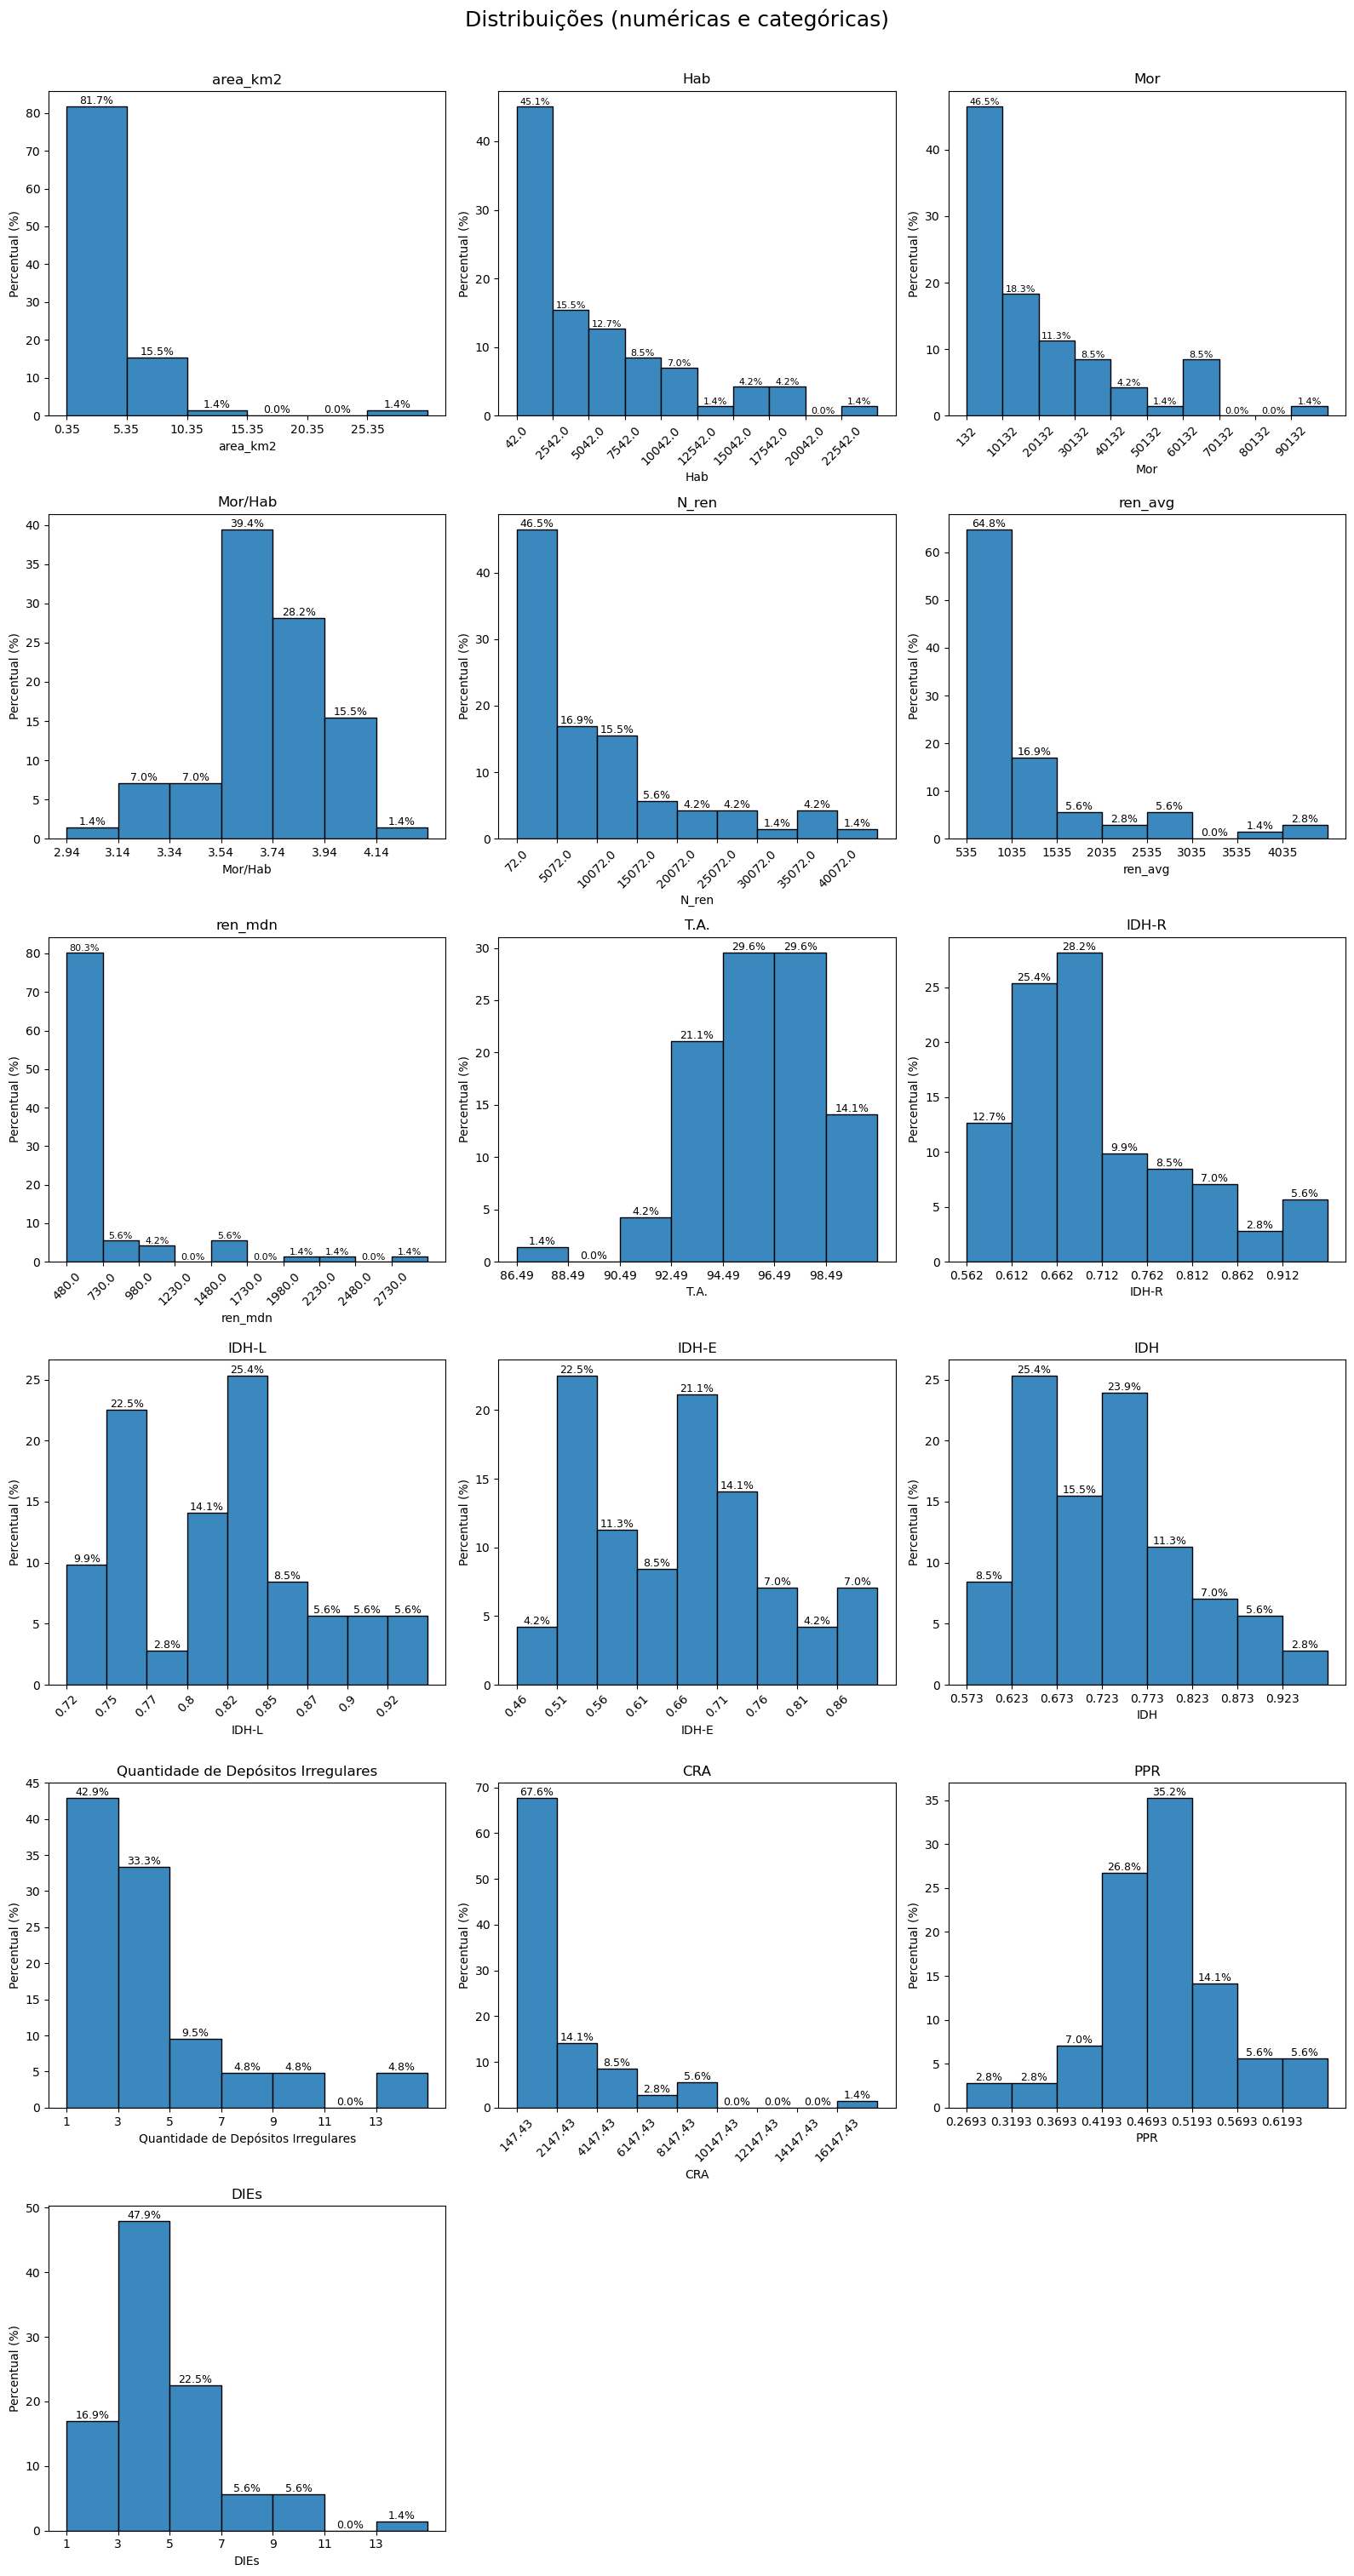

In [4]:
out=mult_plt2(dfo.drop('Bairro', axis=1),max_bins=10,figsize=(16, 30))

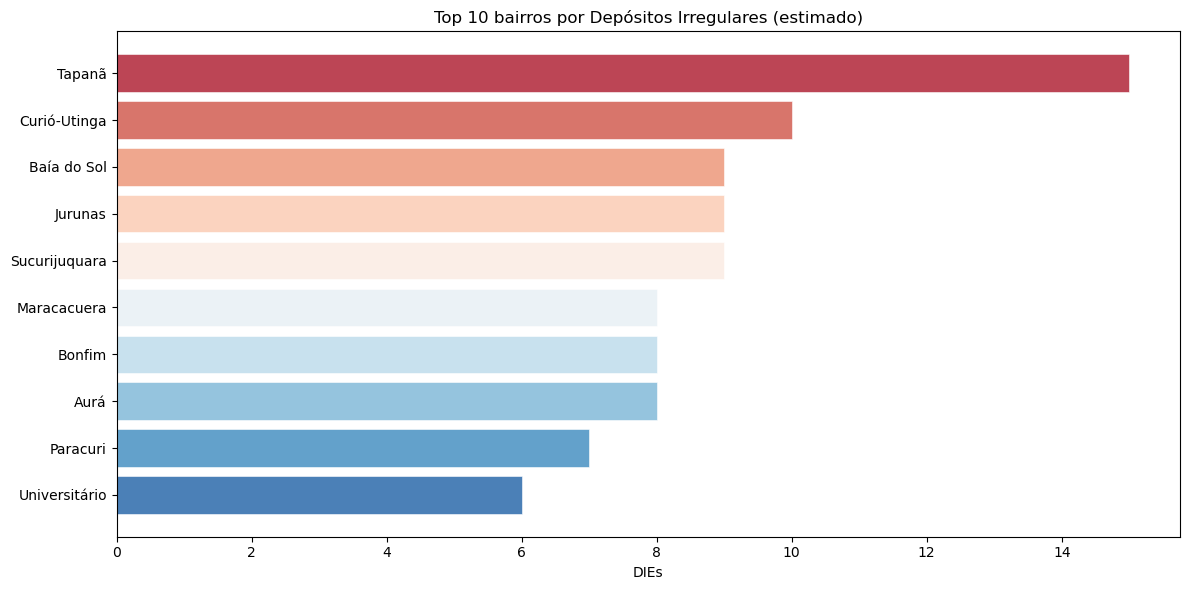

In [15]:
color = sns.color_palette('RdBu_r',16)
gradient_colors = sns.color_palette('RdBu_r', n_colors=10)

plt.figure(figsize=(12,6))
# barra dos top 20 bairros por DIEs
top10 = dfo.sort_values(by="DIEs", ascending=False).head(10)
plt.barh(top10["Bairro"][::-1], top10["DIEs"][::-1],color=gradient_colors, alpha=0.8, edgecolor='white', linewidth=0.5)
plt.xlabel("DIEs")
plt.title("Top 10 bairros por Depósitos Irregulares (estimado)")
plt.tight_layout()
plt.show()


## 4. Correlação

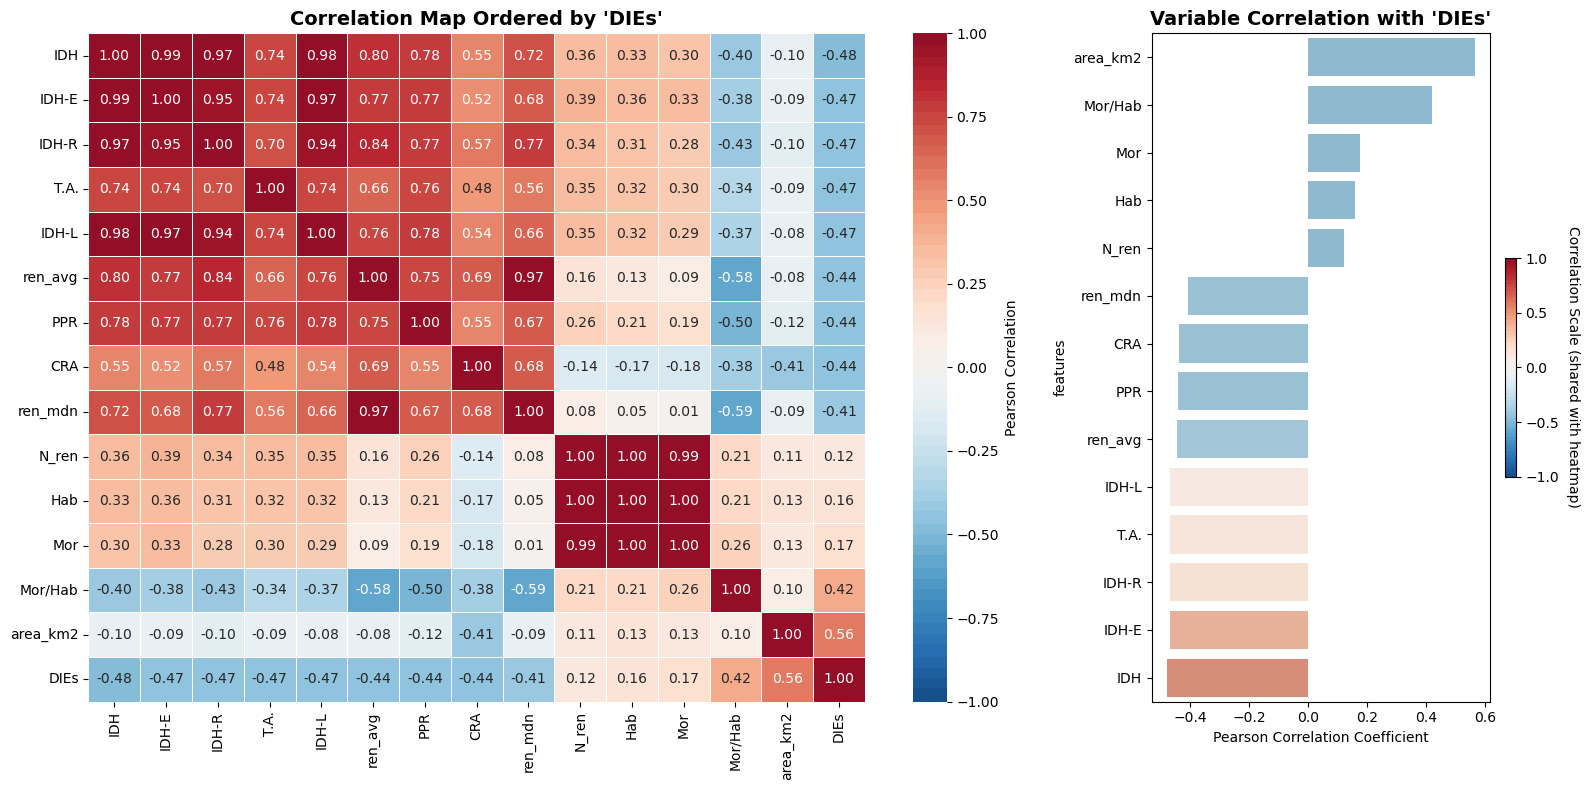

In [5]:
corr,corr_tag=correlation_bar(dfo.drop('Quantidade de Depósitos Irregulares', axis=1),'DIEs')

## 5. Analise Bivariada

In [16]:
def categorizar_dies(dies):
    if dies == 0:
        return 'Aceitável'
    elif 1 <= dies <= 3:
        return 'Baixa Gravidade'
    elif 4 <= dies <= 6:
        return 'Média Gravidade'
    else:  # dies >= 7
        return 'Crítico'
dfo['Dies_cat'] = dfo['DIEs'].apply(categorizar_dies)


,Bairro,area_km2,Hab,Mor,Mor/Hab,N_ren,ren_avg,ren_mdn,T.A.,IDH-R,IDH-L,IDH-E,IDH,QTI,CRA,PPR,DIEs,Dies_cat
0,Cidade Velha,1.474443,3086,12119,3.93,6976.0,1931.71,1000.0,98.64,0.828,0.891,0.802,0.840,3.0,5148.804637,0.575625,3.0,Baixa Gravidade
1,Guamá,4.310685,23402,94432,4.04,44917.0,940.73,510.0,95.91,0.709,0.830,0.699,0.746,4.0,881.657789,0.475654,4.0,Média Gravidade
2,Jurunas,2.557641,15886,64478,4.06,32828.0,1065.28,510.0,95.99,0.778,0.872,0.762,0.802,9.0,1691.025975,0.509135,9.0,Crítico
3,Marambaia,5.052314,17563,66697,3.80,35312.0,1357.51,710.0,97.43,0.792,0.805,0.772,0.813,5.0,1021.024833,0.529439,5.0,Média Gravidade
4,Marco,4.903819,18162,65819,3.62,36975.0,2096.32,1000.0,98.38,0.833,0.888,0.803,0.841,3.0,1547.503739,0.561768,3.0,Baixa Gravidade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Murubira,2.296424,437,1517,3.47,778.0,703.39,510.0,91.45,0.701,0.826,0.663,0.727,NaN,1062.854130,0.512854,4.0,Média Gravidade
67,Bonfim,6.902761,210,776,3.70,209.0,534.64,480.0,86.49,0.562,0.723,0.463,0.573,NaN,286.576339,0.269330,8.0,Crítico
68,Marahú,2.864738,42,132,3.14,72.0,1545.19,740.5,99.22,0.625,0.760,0.553,0.640,NaN,1693.661324,0.545455,3.0,Baixa Gravidade
69,Paraíso,2.330591,95,315,3.32,172.0,740.55,500.0,95.16,0.625,0.760,0.553,0.640,NaN,1054.936904,0.546032,4.0,Média Gravidade


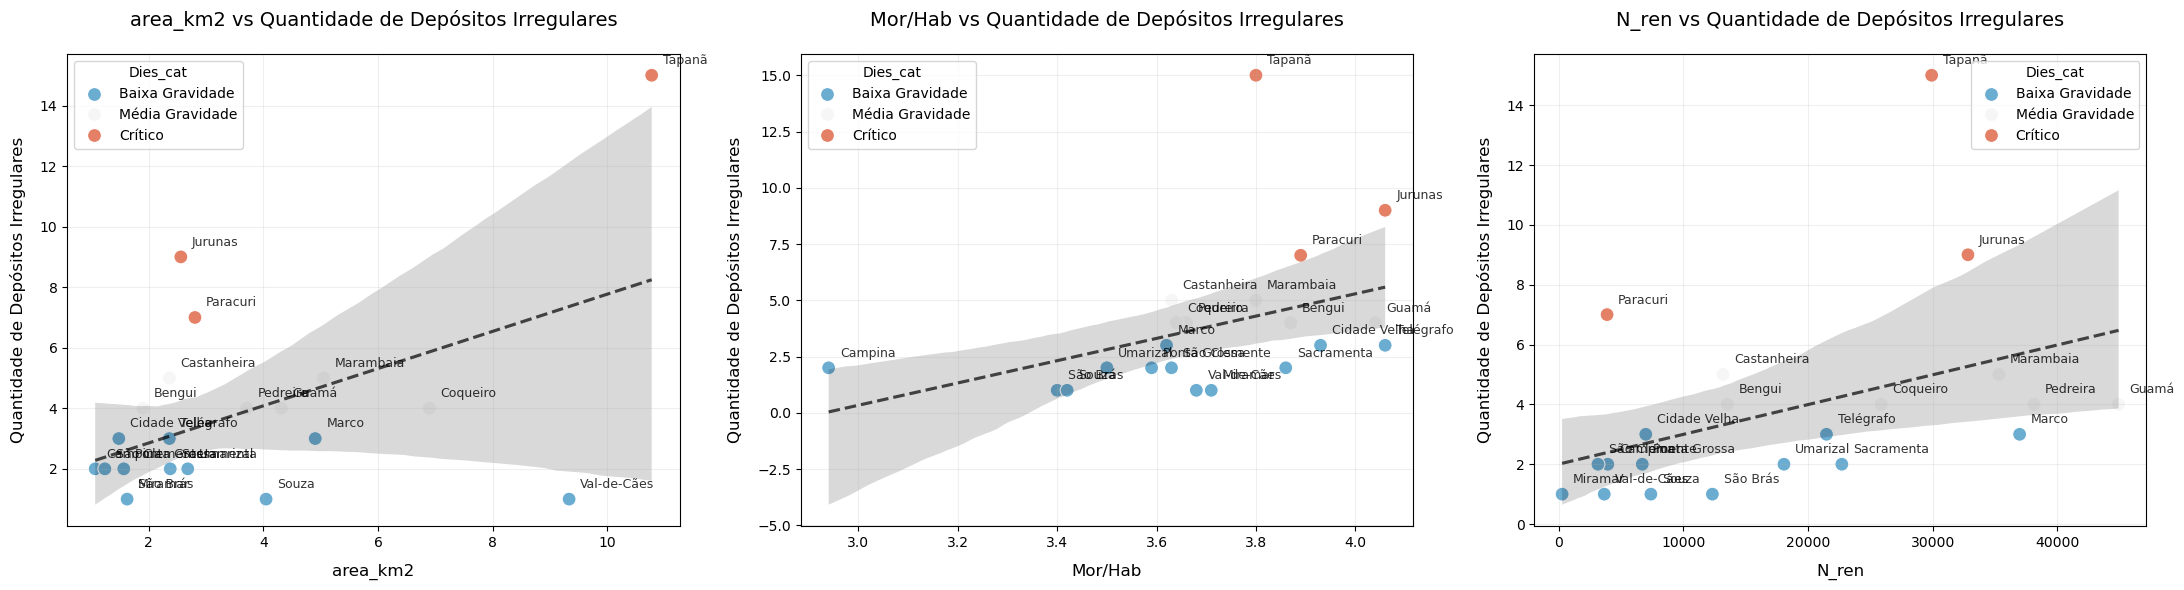

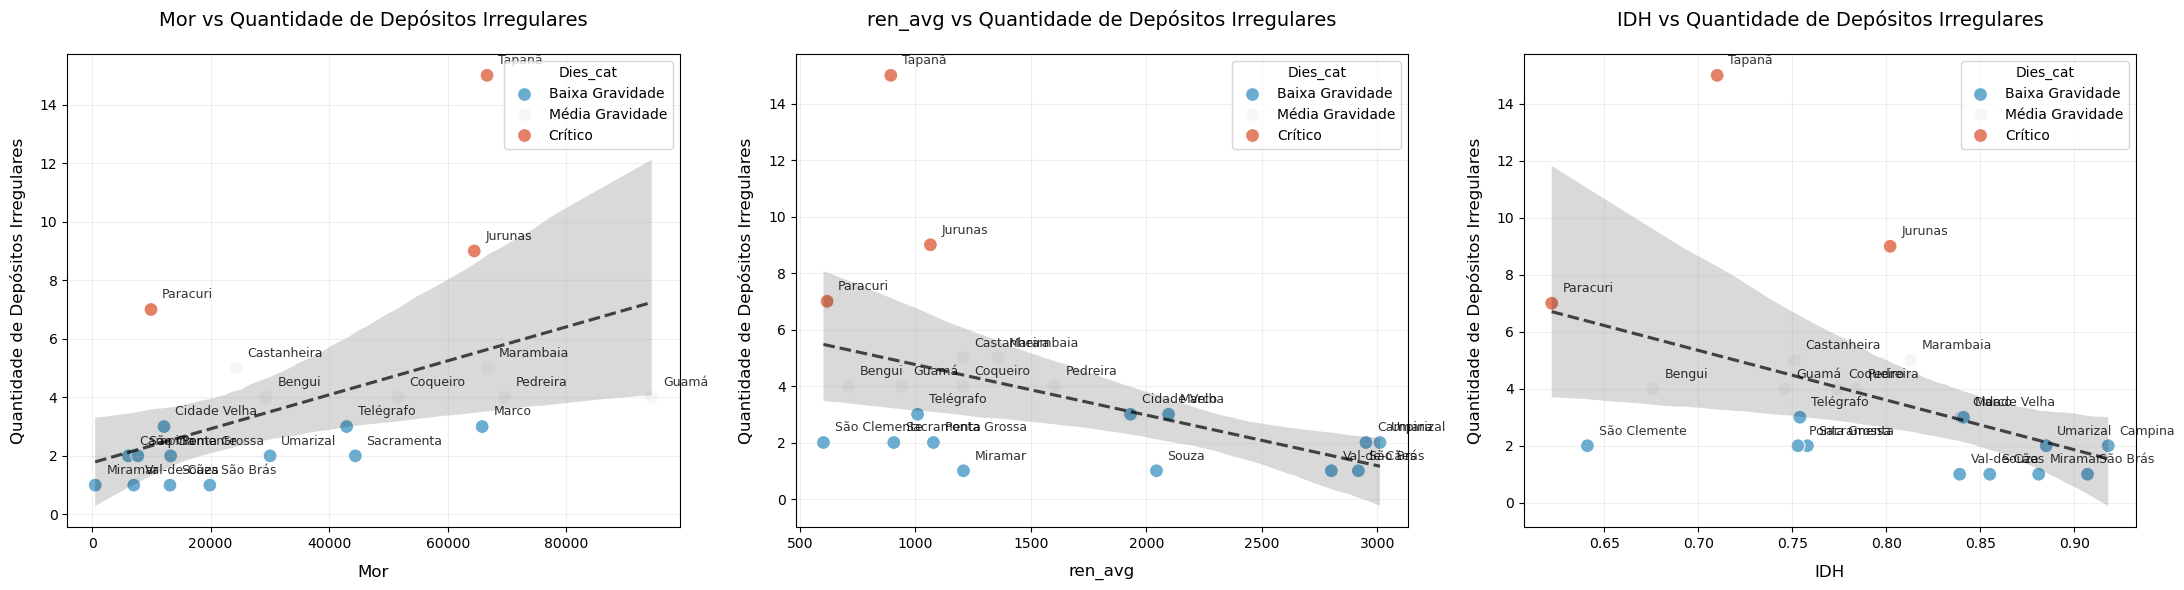

In [11]:
stats1, stats2, stats3 = scatterplot_bairro('area_km2', 'Mor/Hab', 'N_ren', 'Quantidade de Depósitos Irregulares', dfo,'Dies_cat')
stats1, stats2, stats3 = scatterplot_bairro('Mor', 'ren_avg', 'IDH', 'Quantidade de Depósitos Irregulares', dfo,'Dies_cat')

In [10]:
stats1

{'variavel_x': 'area_km2',
 'variavel_y': 'Quantidade de Depósitos Irregulares',
 'correlacao': 0.49239377372459703,
 'p_valor': 0.02335463641516858,
 'r_quadrado': 0.24245162840274967,
 'coef_angular': 0.6139756584357183,
 'intercepto': 1.6277362134341782,
 'equacao': 'y = 0.6140x + 1.6277',
 'n_observacoes': 21}